<a href="https://colab.research.google.com/github/bhattacharya5/BiologicalComputerVision/blob/main/Convolution_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/Biological Computer Vision"

/content/gdrive/MyDrive/Colab Notebooks/Biological Computer Vision


# <font color="blue">**How Convolutions Work**</font>
Convolutional neural networks are a special type of neural network used for image classification. At the heart of any convolutional neural network lies convolution, an operation highly specialized at detecting patterns in images.

Convolutional layers require you to specify the number of filters (kernels). Think of these as a number of pattern detectors. Early convolutional layers detect basic patterns, such as edges, corners, and so on. Specialized patterns are detected at later convolutional layers, such as dog ears or cat paws, depending on the dataset.

A single filter is just a small matrix (usually rectangular). It’s your task to decide on the number of rows and columns, but 3x3 or 5x5 are good starting points. Values inside the filter matrix are initialized randomly. The task of a neural network is to learn the optimal values for the filter matrix, given your specific dataset.

And that’s a convolution in a nutshell! Convolutional layers are useful for finding the optimal filter matrices, but a convolution in itself only applies the filter to the image. There’s a ton of well-known filter matrices for different image operations, such as blurring and sharpening. Let’s see how to work with them next.

## **Dataset and Image Loading**

In [3]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [4]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray');

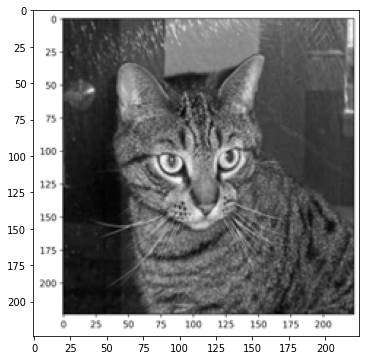

In [7]:
img = Image.open('cat.jpeg')
img = ImageOps.grayscale(img)
img = img.resize(size=(224, 224))
plot_image(img=img)

## **Declare Filters for Convolutions** <br>
The task of a convolutional layer in a neural network is to find N filters that best extract features from the images. Did you know there are known filters for doing different image operations?

Well, there are — such as a filter for sharpening, blurring, and outlining. I’ve copied the filter matrix values from the setosa.io website, and I strongly recommend you to check it out for a deeper dive.

Anyhow, all mentioned filters are nothing but 3x3 matrices. Copy the following code to store them to variables:

In [8]:

sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

Simple, right? That’s all there is to individual filters. Let’s write a convolution from scratch next and apply these to our image.<br><br>
## **Implement Convolution From Scratch**<br>
Applying a convolution to an image will make it smaller (assuming no padding). How much smaller depends on the filter size. All of ours are 3x3, but you can go larger.

Sliding, or convolving a 3x3 filter over images means we’ll lose a single pixel on all sides (2 in total). For example, sliding a 3x3 filter over a 224x224 image results in a 222x222 image. Likewise, sliding a 5x5 filter over the same image results in a 220x220 image.

We’ll declare a helper function to calculate the image size after applying the convolution. It’s nothing fancy, but will make our lives a bit easier. It basically calculates how many windows of the filter size you can fit to an image (assuming square image):

In [9]:
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    # From 0 up to img size (if img size = 224, then up to 223)
    for i in range(img_size):
        # Add the kernel size (let's say 3) to the current i
        added = i + kernel_size
        # It must be lower than the image size
        if added <= img_size:
            # Increment if so
            num_pixels += 1
            
    return num_pixels

Here’s a result from a couple of tests:

Image size: 224, filter size: 3<br>
Image size: 224, filter size: 5

Works as advertised. Let’s work on a convolution function next. Here’s what a 3x3 filter does to a single 3x3 image subset:

1. Extracts it to a separate matrix
2. Does an element-wise multiplication between the image subset and the filter
3. Sums the results

Here’s an implementation in code for a single 3x3 pixel subset:

In [10]:
calculate_target_size(1024,3)

1022

In [11]:
calculate_target_size(1024,5)

1020

That was easy, but how can you apply the logic to an entire image? Well, easily. The convolve() function calculates the target size and creates a matrix of zeros with that shape, iterates over all rows and columns of the image matrix, subsets it, and applies the convolution. Sounds like a lot when put in a single sentence, but the code shouldn’t give you too much headache:

In [12]:
def convolve(img: np.array, kernel: np.array) -> np.array:
    # Assuming a rectangular image
    tgt_size = calculate_target_size(
        img_size=img.shape[0],
        kernel_size=kernel.shape[0]
    )
    # To simplify things
    k = kernel.shape[0]
    
    # 2D array of zeros
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    # Iterate over the rows
    for i in range(tgt_size):
        # Iterate over the columns
        for j in range(tgt_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = img[i:i+k, j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_img

Let’s test the thing. The following snippet applies the **sharpening** filter to our image:

In [13]:
img_sharpened = convolve(img=np.array(img), kernel=sharpen)
img_sharpened

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

You can use the *plot_two_images()* function to visualize our cat image before and after the transformation:

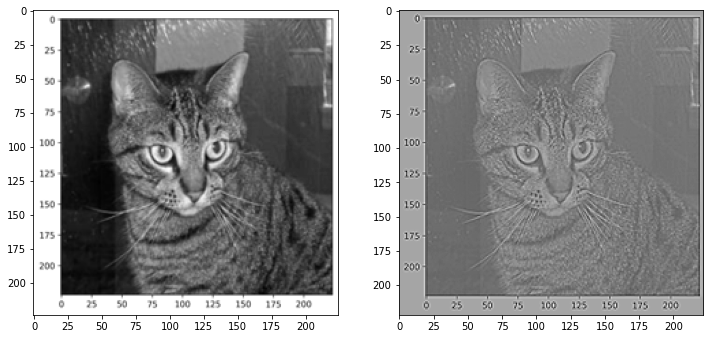

In [14]:
plot_two_images(
    img1=img, 
    img2=img_sharpened
)

The colors are a bit off since values in the right image don’t range between 0 and 255. It’s not a big issue, but you can “fix” it by replacing all negative values with zeros:

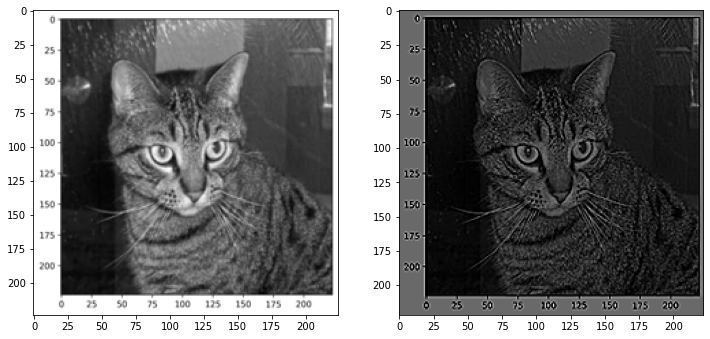

In [15]:
def negative_to_zero(img: np.array) -> np.array:
    img = img.copy()
    img[img < 0] = 0
    return img

plot_two_images(
    img1=img, 
    img2=negative_to_zero(img=img_sharpened)
)

The image on the right definitely looks sharpened, no arguing there. Let’s see what **blurring** does next:

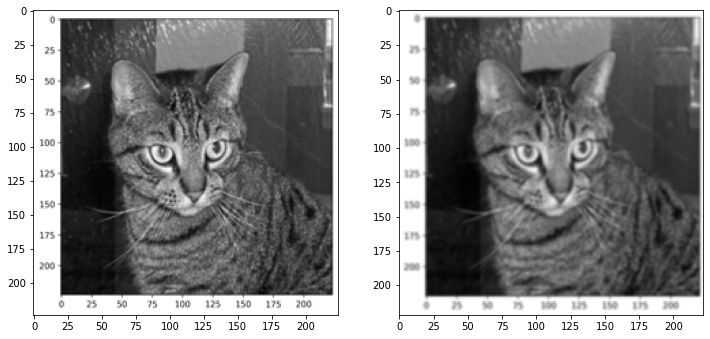

In [16]:
img_blurred = convolve(img=np.array(img), kernel=blur)
plot_two_images(
    img1=img, 
    img2=img_blurred
)

The blurring filter matrix doesn’t have negative values, so the coloring is identical. Once again, there’s no debate — the blurring filter worked as advertised.

Finally, let’s see what the **outline** filter will do to our image:

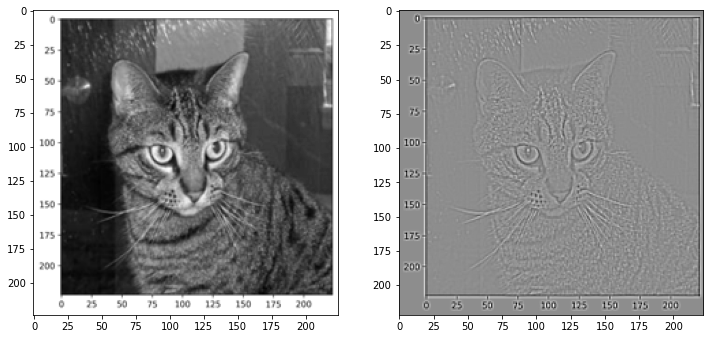

In [17]:
img_outlined = convolve(img=np.array(img), kernel=outline)
plot_two_images(
    img1=img, 
    img2=img_outlined
)

It also suffers from the coloring problem, as values in the matrix are mostly negative. Use *negative_to_zero()* to get a clearer idea:

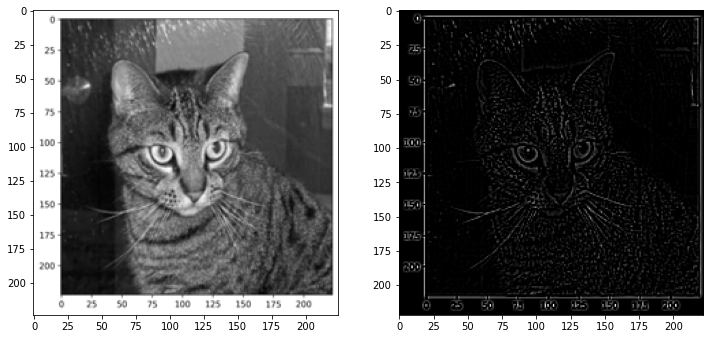

In [18]:
plot_two_images(
    img1=img, 
    img2=negative_to_zero(img=img_outlined)
)

You know what the only problem is? The convolved images are of shape 222x222 pixels. What if you want to keep the original size of 224x224 pixels? That’s where padding comes into play.

## **Implement Convolution with Padding From Scratch**

TensorFlow’s Conv2D layer lets you specify either valid or same for the padding parameter. The first one (default) adds no padding before applying the convolution operation. It’s basically what we’ve covered in the previous section.

The second one adds padding depending on the filter size, so the source and convolved images are of the same shape.

Padding is essentially a “black” border around the image. It’s black because the values are zeros, and zeros represent the color black. The black borders don’t have any side effects on the calculations, as it’s just a multiplication with zero.

In the real world, pixels on the edges usually don’t contain significant patterns, so losing them isn’t the worst thing in the world.

Onto the code now. First things first, let’s declare a function that returns the number of pixels we need to pad the image with on a single side, depending on the kernel size. It’s just an integer division with 2:

In [19]:
def get_padding_width_per_side(kernel_size: int) -> int:
    # Simple integer division
    return kernel_size // 2

There isn’t much to it. We’ll now write a function that adds padding to the image. First, the function declares a matrix of zeros with a shape of `image.shape + padding * 2`. We’re multiplying the padding with 2 because we need it on all sides. The function then indexes the matrix so the padding is ignored and changes the zeros with the actual image values:

In [20]:
def add_padding_to_image(img: np.array, padding_width: int) -> np.array:
    # Array of zeros of shape (img + padding_width)
    img_with_padding = np.zeros(shape=(
        img.shape[0] + padding_width * 2,  # Multiply with two because we need padding on all sides
        img.shape[1] + padding_width * 2
    ))
    
    # Change the inner elements
    # For example, if img.shape = (224, 224), and img_with_padding.shape = (226, 226)
    # keep the pixel wide padding on all sides, but change the other values to be the same as img
    img_with_padding[padding_width:-padding_width, padding_width:-padding_width] = img
    
    return img_with_padding

Let’s test it by adding a padding to the image for a 3x3 filter:

In [22]:
pad_3x3 = get_padding_width_per_side(kernel_size=3)
pad_3x3

1

(226, 226)


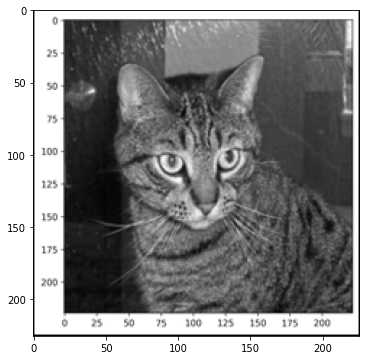

In [23]:
img_with_padding_3x3 = add_padding_to_image(
    img=np.array(img), 
    padding_width=pad_3x3
)

print(img_with_padding_3x3.shape)
plot_image(img_with_padding_3x3)

You can see the black border if you zoom in close enough. If you’re wondering, this image has a shape of 226x226 pixels. Here’s how it looks like when displayed as a matrix:

In [35]:
col_size = img_with_padding_3x3[1].size
row_size = len(img_with_padding_3x3)
print(row_size, col_size)

226 226


You can see the original image surrounded with zeros, which is what we wanted. Let’s see if the same holds true for the 5x5 kernel:

In [30]:
pad_5x5 = get_padding_width_per_side(kernel_size=5)
pad_5x5

2

(228, 228)


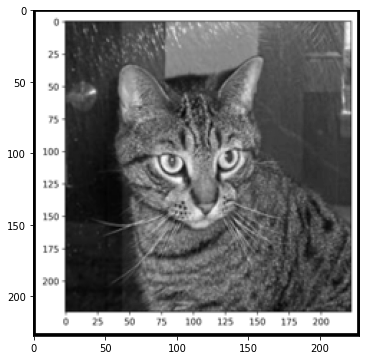

In [31]:
img_with_padding_5x5 = add_padding_to_image(
    img=np.array(img), 
    padding_width=pad_5x5
)

print(img_with_padding_5x5.shape)
plot_image(img_with_padding_5x5)

Now you can definitely see the black border on this 228x228 image. Let’s see how it looks when printed as a matrix:

In [32]:
img_with_padding_5x5

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0., 255., ..., 255.,   0.,   0.],
       ...,
       [  0.,   0., 255., ..., 255.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [34]:
col_size = img_with_padding_5x5[1].size
row_size= len(img_with_padding_5x5)
print(row_size, col_size)

228 228


It looks how it should — two pixel padding on all sides. Let’s apply a sharpening filter to our single-pixel-padded image to see if there are any issues:

(226, 226)


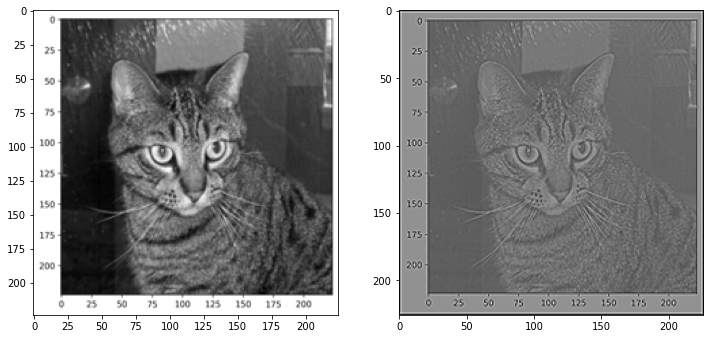

In [37]:
img_padded_5x5_sharpened = convolve(img=img_with_padding_5x5, kernel=sharpen)
print(img_padded_5x5_sharpened.shape)

plot_two_images(
    img1=img, 
    img2=img_padded_5x5_sharpened
)

Works without any issues. The convolved image has a shape of 224x224 pixels, which is exactly what we wanted.

And that’s convolutions and padding in a nutshell.

## **Conclusion**

Convolutions are easier than they sound. The whole thing boils down to sliding a filter across an entire image. If you drop all the matrix terminology, it simplifies to elementary school math — multiplication and addition. There’s nothing fancy going on.

We could complicate things further by introducing strides — but these are common to both convolutions and pooling.

Reference material - [TensorFlow for Computer Vision — How to Implement Convolutions From Scratch in Python](https://towardsdatascience.com/tensorflow-for-computer-vision-how-to-implement-convolutions-from-scratch-in-python-609158c24f82)